In [ ]:
!pip install gcsfs

In [48]:
import pandas as pd
import datetime
import gcsfs
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.style
mpl.style.use('seaborn-bright')
%matplotlib inline

In [49]:
fs = gcsfs.GCSFileSystem(project='omina-gcp-resource')
with fs.open('datasony/user1.txt') as f:
    df = pd.read_csv(f, sep = ",", header=0)
df.head()

,timestamp,date_id,dow,utc_time_sec,offset_time_sec,accuracy,longitude,latitude
0,2015-03-01 07:16:39,20150301,Sun,1425190599,-3600,10.000,-64.979205,-15.687428
1,2015-03-01 07:17:12,20150301,Sun,1425190632,-3600,29.000,-64.979196,-15.687460
2,2015-03-01 07:17:25,20150301,Sun,1425190645,-3600,33.000,-64.979229,-15.687334
3,2015-03-01 07:18:19,20150301,Sun,1425190699,-3600,25.000,-64.979197,-15.687459
4,2015-03-01 07:18:25,20150301,Sun,1425190705,-3600,17.677,-64.979197,-15.687459


In [50]:
#df.dtypes
#df.offset_time_sec.unique()

In [51]:
len(df.accuracy)

20266

In [52]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.index = df['timestamp']
del df['timestamp']
df.head()

,date_id,dow,utc_time_sec,offset_time_sec,accuracy,longitude,latitude
timestamp,,,,,,,
2015-03-01 07:16:39,20150301,Sun,1425190599,-3600,10.000,-64.979205,-15.687428
2015-03-01 07:17:12,20150301,Sun,1425190632,-3600,29.000,-64.979196,-15.687460
2015-03-01 07:17:25,20150301,Sun,1425190645,-3600,33.000,-64.979229,-15.687334
2015-03-01 07:18:19,20150301,Sun,1425190699,-3600,25.000,-64.979197,-15.687459
2015-03-01 07:18:25,20150301,Sun,1425190705,-3600,17.677,-64.979197,-15.687459


In [53]:
print (df.index.min())
print (df.index.max())

2015-03-01 07:16:39
2015-03-31 21:29:27


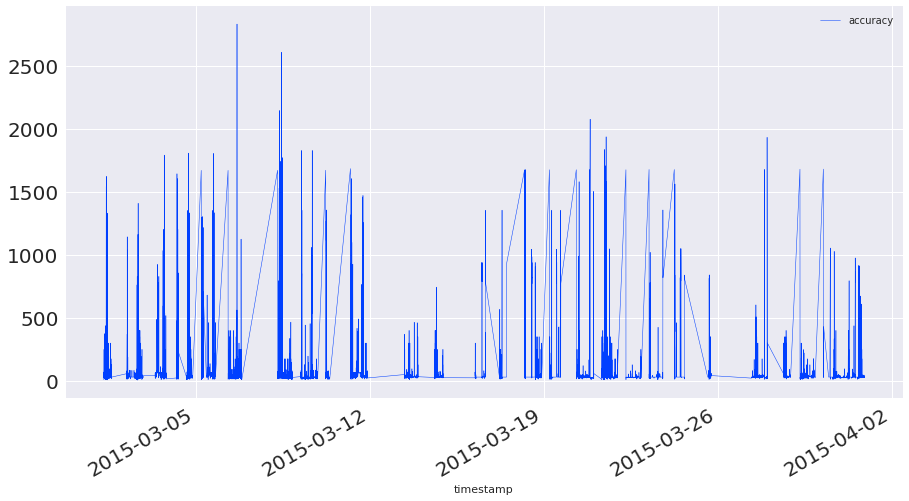

In [54]:
df['accuracy'].plot(subplots=True, figsize=(15,8), linewidth=0.5, fontsize=20)
plt.legend(loc='best')

In [55]:
print(len(df[df['accuracy'] >50]))

5638


In [56]:
df.sort_index(inplace=True)
df.head()

,date_id,dow,utc_time_sec,offset_time_sec,accuracy,longitude,latitude
timestamp,,,,,,,
2015-03-01 07:16:39,20150301,Sun,1425190599,-3600,10.000,-64.979205,-15.687428
2015-03-01 07:17:12,20150301,Sun,1425190632,-3600,29.000,-64.979196,-15.687460
2015-03-01 07:17:25,20150301,Sun,1425190645,-3600,33.000,-64.979229,-15.687334
2015-03-01 07:18:19,20150301,Sun,1425190699,-3600,25.000,-64.979197,-15.687459
2015-03-01 07:18:25,20150301,Sun,1425190705,-3600,17.677,-64.979197,-15.687459


In [57]:
df['longitude_lag'] = df.longitude.shift()
df['latitude_lag'] = df.latitude.shift()
df['utc_time_sec_lag'] = df.utc_time_sec.shift()

In [58]:
df.head()

,date_id,dow,utc_time_sec,offset_time_sec,accuracy,longitude,latitude,longitude_lag,latitude_lag,utc_time_sec_lag
timestamp,,,,,,,,,,
2015-03-01 07:16:39,20150301,Sun,1425190599,-3600,10.000,-64.979205,-15.687428,NaN,NaN,NaN
2015-03-01 07:17:12,20150301,Sun,1425190632,-3600,29.000,-64.979196,-15.687460,-64.979205,-15.687428,1.425191e+09
2015-03-01 07:17:25,20150301,Sun,1425190645,-3600,33.000,-64.979229,-15.687334,-64.979196,-15.687460,1.425191e+09
2015-03-01 07:18:19,20150301,Sun,1425190699,-3600,25.000,-64.979197,-15.687459,-64.979229,-15.687334,1.425191e+09
2015-03-01 07:18:25,20150301,Sun,1425190705,-3600,17.677,-64.979197,-15.687459,-64.979197,-15.687459,1.425191e+09


In [59]:
def eucdist(lo1, lo2, la1, la2):
  R = 6371000
  phi_1=math.radians(la1)
  phi_2=math.radians(la2)
  delta_lat = math.radians(la1 - la2)
  delta_lon = math.radians(lo1 - lo2)
  a = math.sin(delta_lat/2)**2 + math.cos(phi_1)*math.cos(phi_2)*(math.sin(delta_lon/2)**2)
  c = 2*math.atan2(math.sqrt(a), math.sqrt(1-a))
  d = R*c
  return d

In [60]:
df['dist'] = df.apply(lambda row: eucdist(row['longitude'], row['longitude_lag'], row['latitude'], row['latitude_lag']), axis=1)
df.head()

,date_id,dow,utc_time_sec,offset_time_sec,accuracy,longitude,latitude,longitude_lag,latitude_lag,utc_time_sec_lag,dist
timestamp,,,,,,,,,,,
2015-03-01 07:16:39,20150301,Sun,1425190599,-3600,10.000,-64.979205,-15.687428,NaN,NaN,NaN,NaN
2015-03-01 07:17:12,20150301,Sun,1425190632,-3600,29.000,-64.979196,-15.687460,-64.979205,-15.687428,1.425191e+09,3.642615
2015-03-01 07:17:25,20150301,Sun,1425190645,-3600,33.000,-64.979229,-15.687334,-64.979196,-15.687460,1.425191e+09,14.389881
2015-03-01 07:18:19,20150301,Sun,1425190699,-3600,25.000,-64.979197,-15.687459,-64.979229,-15.687334,1.425191e+09,14.348658
2015-03-01 07:18:25,20150301,Sun,1425190705,-3600,17.677,-64.979197,-15.687459,-64.979197,-15.687459,1.425191e+09,0.000000


In [61]:
df['check'] = [eucdist(lo1, lo2, la1, la2) for (lo1, lo2, la1, la2) in zip(df['longitude'], df['longitude_lag'], df['latitude'], df['latitude_lag'])]
df.head()

,date_id,dow,utc_time_sec,offset_time_sec,accuracy,longitude,latitude,longitude_lag,latitude_lag,utc_time_sec_lag,dist,check
timestamp,,,,,,,,,,,,
2015-03-01 07:16:39,20150301,Sun,1425190599,-3600,10.000,-64.979205,-15.687428,NaN,NaN,NaN,NaN,NaN
2015-03-01 07:17:12,20150301,Sun,1425190632,-3600,29.000,-64.979196,-15.687460,-64.979205,-15.687428,1.425191e+09,3.642615,3.642615
2015-03-01 07:17:25,20150301,Sun,1425190645,-3600,33.000,-64.979229,-15.687334,-64.979196,-15.687460,1.425191e+09,14.389881,14.389881
2015-03-01 07:18:19,20150301,Sun,1425190699,-3600,25.000,-64.979197,-15.687459,-64.979229,-15.687334,1.425191e+09,14.348658,14.348658
2015-03-01 07:18:25,20150301,Sun,1425190705,-3600,17.677,-64.979197,-15.687459,-64.979197,-15.687459,1.425191e+09,0.000000,0.000000


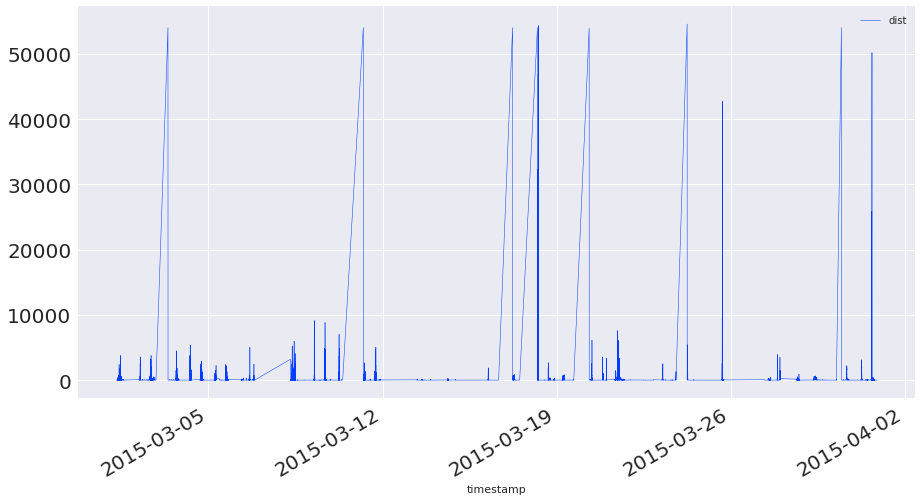

In [62]:
df['dist'].plot(subplots=True, figsize=(15,8), linewidth=0.5, fontsize=20)
plt.legend(loc='best')

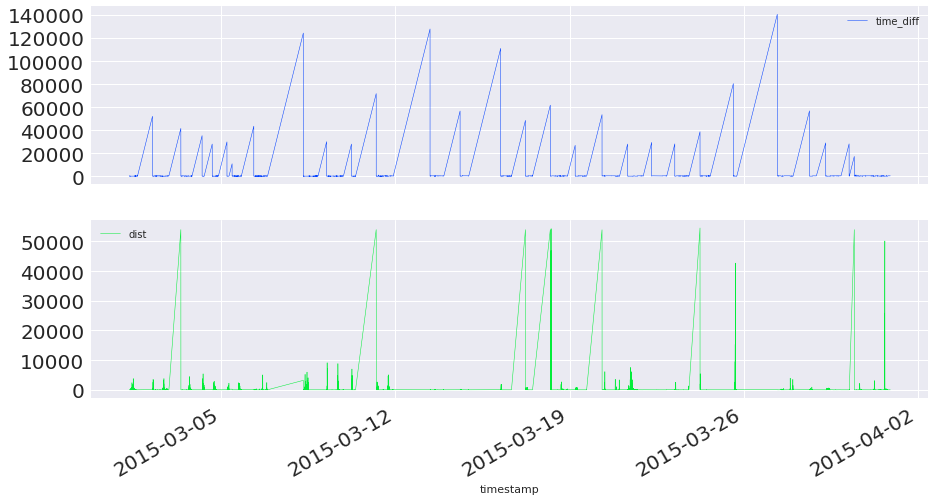

In [63]:
df['time_diff'] = df['utc_time_sec'] - df['utc_time_sec_lag']

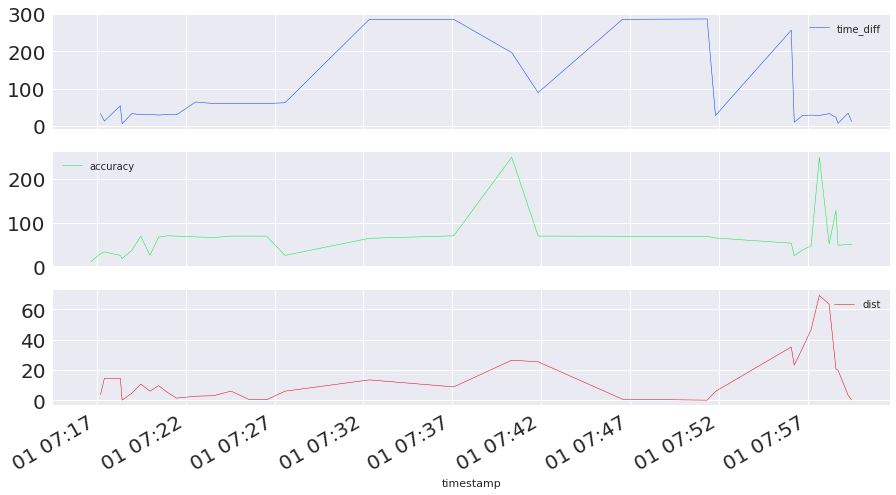

In [71]:
df['2015-03-01 07:16:00' : '2015-03-01 07:59:59'][['time_diff', 'accuracy', 'dist']].plot(subplots=True, figsize=(15,8), linewidth=0.5, fontsize=20)
plt.legend(loc='best')

In [69]:
df.head(30)

,date_id,dow,utc_time_sec,offset_time_sec,accuracy,longitude,latitude,longitude_lag,latitude_lag,utc_time_sec_lag,dist,check,time_diff
timestamp,,,,,,,,,,,,,
2015-03-01 07:16:39,20150301,Sun,1425190599,-3600,10.000000,-64.979205,-15.687428,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-01 07:17:12,20150301,Sun,1425190632,-3600,29.000000,-64.979196,-15.687460,-64.979205,-15.687428,1.425191e+09,3.642615,3.642615,33.0
2015-03-01 07:17:25,20150301,Sun,1425190645,-3600,33.000000,-64.979229,-15.687334,-64.979196,-15.687460,1.425191e+09,14.389881,14.389881,13.0
2015-03-01 07:18:19,20150301,Sun,1425190699,-3600,25.000000,-64.979197,-15.687459,-64.979229,-15.687334,1.425191e+09,14.348658,14.348658,54.0
2015-03-01 07:18:25,20150301,Sun,1425190705,-3600,17.677000,-64.979197,-15.687459,-64.979197,-15.687459,1.425191e+09,0.000000,0.000000,6.0
2015-03-01 07:18:58,20150301,Sun,1425190738,-3600,36.650002,-64.979202,-15.687501,-64.979197,-15.687459,1.425191e+09,4.631931,4.631931,33.0
2015-03-01 07:19:28,20150301,Sun,1425190768,-3600,69.055000,-64.979193,-15.687406,-64.979202,-15.687501,1.425191e+09,10.603712,10.603712,30.0
2015-03-01 07:19:59,20150301,Sun,1425190799,-3600,25.000000,-64.979197,-15.687459,-64.979193,-15.687406,1.425191e+09,5.968616,5.968616,31.0
2015-03-01 07:20:28,20150301,Sun,1425190828,-3600,66.803001,-64.979180,-15.687374,-64.979197,-15.687459,1.425191e+09,9.604213,9.604213,29.0
